# Proyecto No. 1  Statistical Learning
##  07140147 José Luis Hernández
## 21001119 Velvet Suan González Ramírez

###  Librerias

In [1]:
##  librerias para modelo base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## libreria para modelo sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## importacion de funciones   fncs_prjct.py  (funciones base)
import fncs_prjct as fn

### Carga y transformacion de dataset y variables a utilizar

In [2]:
data = np.load("proyecto_training_data.npy")
data = pd.DataFrame(data)
data.rename(columns={0: "SalePrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"}, inplace = True)
data.head(5)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [3]:
### slicing
training = pd.DataFrame(data[0:1168])
test = pd.DataFrame(data[1169:1460])

In [4]:
###  analisis exploratorio general
columnas_df = fn.select_col_numerics(data)
columnas_df

['SalePrice',
 'OverallQual',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'YearBuilt',
 'LotFrontage']

In [5]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [6]:
data.isnull().sum()

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
dtype: int64

In [7]:
data.isnull().mean()

SalePrice       0.000000
OverallQual     0.000000
1stFlrSF        0.000000
TotRmsAbvGrd    0.000000
YearBuilt       0.000000
LotFrontage     0.177397
dtype: float64

### Histograma de todas las variables

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


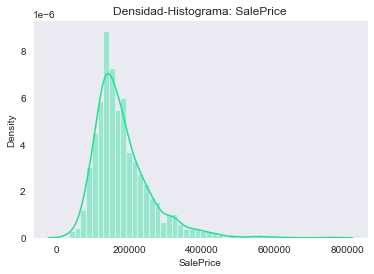

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


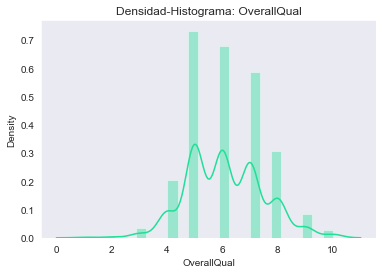

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


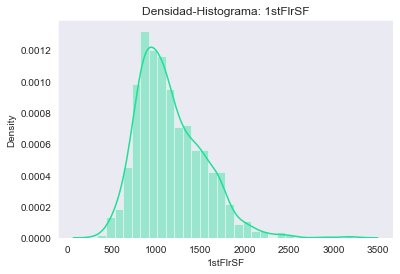

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


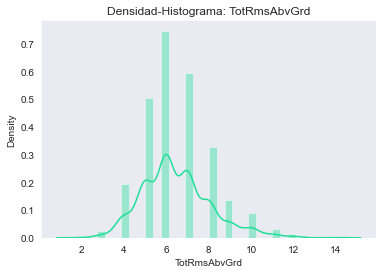

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


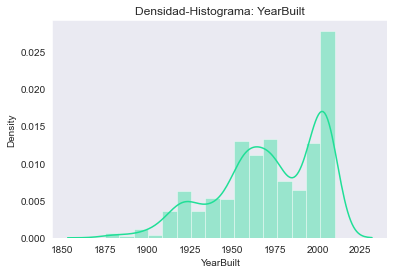

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


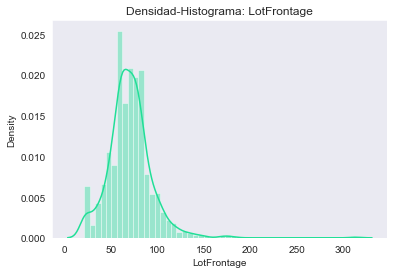

In [8]:
for col in columnas_df:
    fn.graficar_data_densidad(training, col) 

### Regresion y densidad entre variable Sale Price vs todas las variables

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


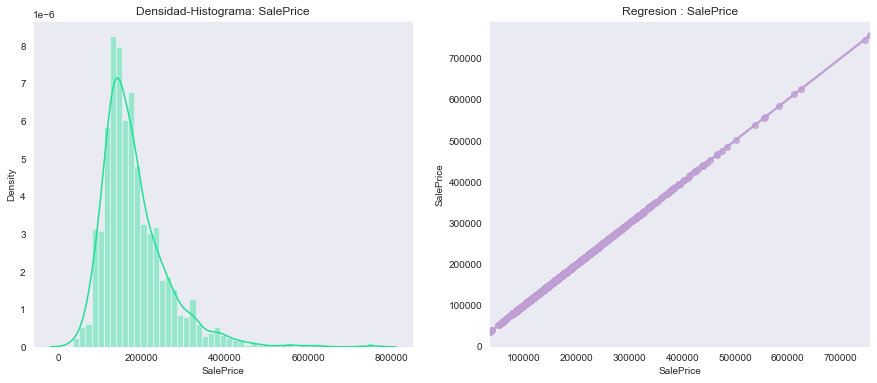

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


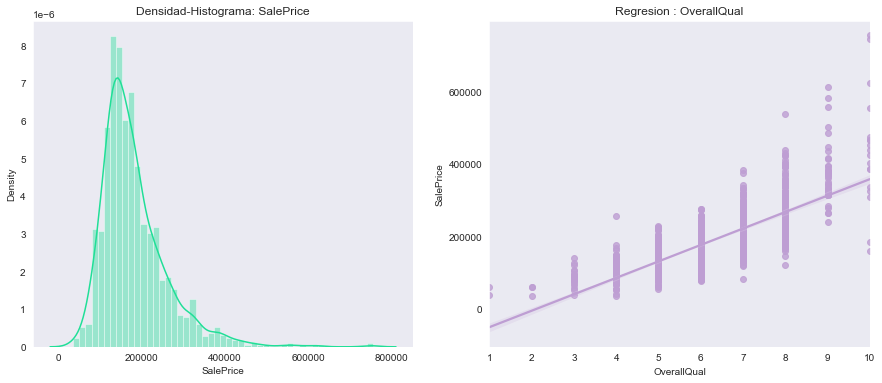

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


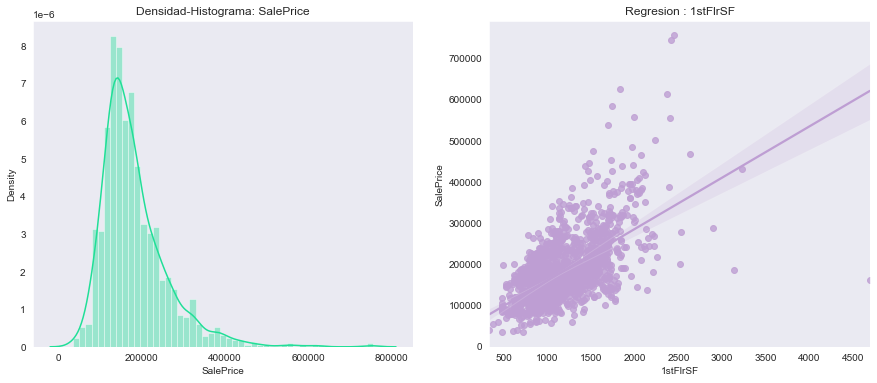

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


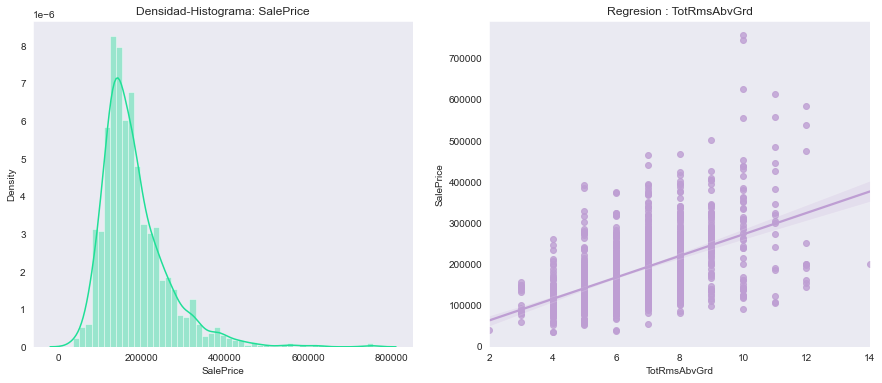

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


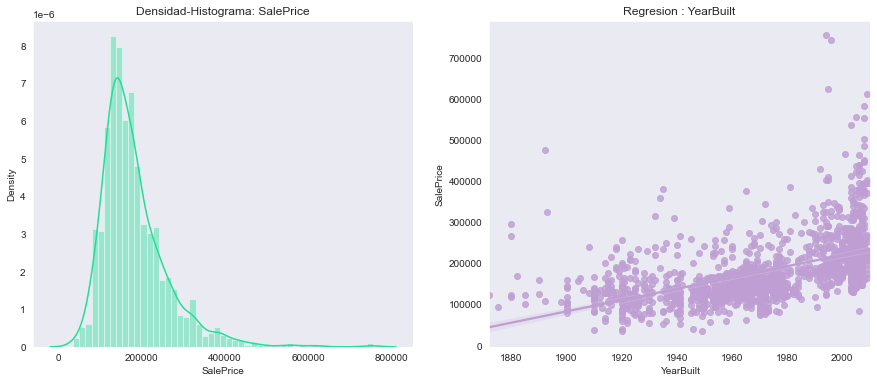

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


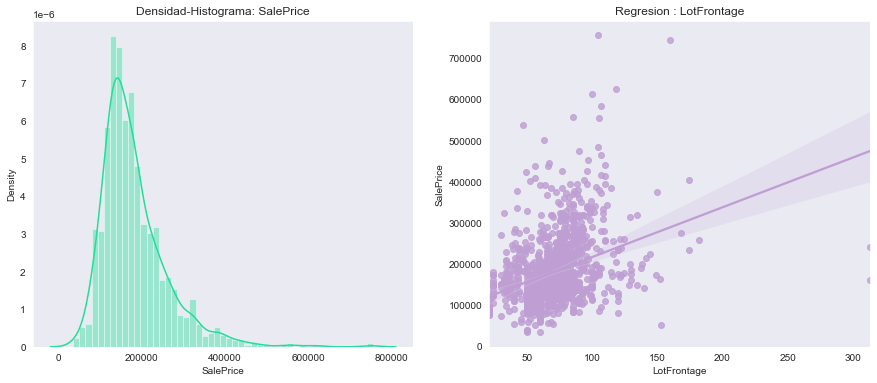

In [9]:
for col in columnas_df:
    fn.plot_reg_dens(data, 'SalePrice', col)  

###  analisis exploratorio data entrenamiento

In [10]:
training.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [11]:
training.isnull().sum()

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     206
dtype: int64

In [12]:
training.isnull().mean()

SalePrice       0.00000
OverallQual     0.00000
1stFlrSF        0.00000
TotRmsAbvGrd    0.00000
YearBuilt       0.00000
LotFrontage     0.17637
dtype: float64

### Correlacion data de entramiento

<AxesSubplot:>

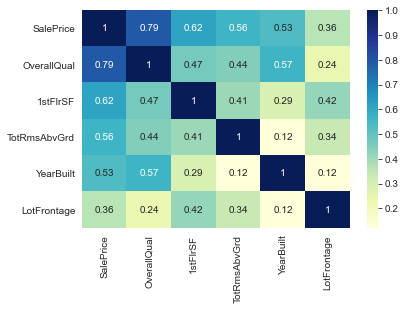

In [13]:
correlacion = training.corr()
sns.heatmap(training.corr(method = "pearson"), annot=True, cmap = "YlGnBu")

###  top 2 de las mejores variables para analisis

<Figure size 1152x432 with 0 Axes>

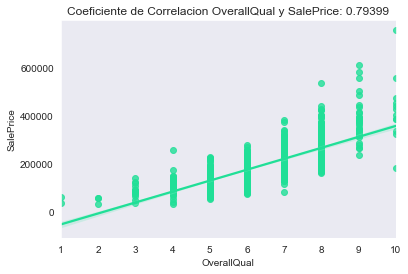

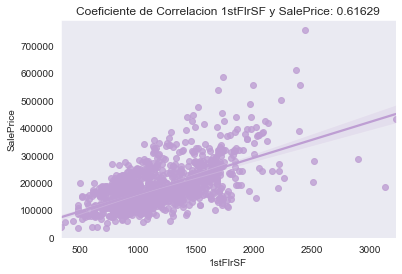

In [14]:
fn.plot_regresion_top2(training,'SalePrice','OverallQual','1stFlrSF')

### Configuracion de variables de entrenamiento y test con arrays de numpy

In [15]:
variableX = training['OverallQual']
variableY = training['SalePrice']
variableXtest = test['OverallQual']
variableYtest = test['SalePrice']

xvariable = np.array(variableX)
yvariable = np.array(variableY)
xvtest = np.array(variableXtest)
yvtest = np.array(variableYtest)

### Ejecución Modelo de Entrenamiento

In [16]:
fn.training_model(variableX, variableY, 2, 2)

{0: (7.0, 208500.0, 16.0, 208484.0, 18606840.006849315, 2, 2),
 1: (6.0, 181500.0, 14.0, 181486.0, 14099815.15239726, 2, 2),
 2: (7.0, 223500.0, 16.0, 223484.0, 21380607.130136985, 2, 2),
 3: (7.0, 140000.0, 16.0, 139984.0, 8388493.2602739725, 2, 2),
 4: (8.0, 250000.0, 18.0, 249982.0, 26751284.38527397, 2, 2),
 5: (5.0, 143000.0, 12.0, 142988.0, 8752383.62328767, 2, 2),
 6: (8.0, 307000.0, 18.0, 306982.0, 40341587.46746575, 2, 2),
 7: (7.0, 200000.0, 16.0, 199984.0, 17120548.05479452, 2, 2),
 8: (7.0, 129900.0, 16.0, 129884.0, 7221683.842465753, 2, 2),
 9: (5.0, 118000.0, 12.0, 117988.0, 5959404.171232876, 2, 2),
 10: (5.0, 129500.0, 12.0, 129488.0, 7177714.958904109, 2, 2),
 11: (9.0, 345000.0, 20.0, 344980.0, 50946575.51369863, 2, 2),
 12: (5.0, 144000.0, 12.0, 143988.0, 8875232.938356163, 2, 2),
 13: (7.0, 279500.0, 16.0, 279484.0, 33438059.184931505, 2, 2),
 14: (6.0, 157000.0, 14.0, 156986.0, 10549916.17979452, 2, 2),
 15: (7.0, 132000.0, 16.0, 131984.0, 7457096.0, 2, 2),
 16: (6

### Ejecución Funcion  Modelo de Regresion Lineal  (modelo propio)

In [17]:
a = 0   ## definicion de beta0 con valor 0
b = 0   ## definicion de beta1 con valor 0
epoch = 75000   ## asignacion de 75K repeticion
learning_rate = 0.01    ### learning rate de 0.01
imprimir_error_cada = 10   ### impresion de errores

In [18]:
beta0, beta1, resultado_gen, ayb, rmse, estimaciones_g, vr = fn.gradiant_training(vx = xvariable, vy = yvariable, b0 = a, b1 = b, alpha = learning_rate, epochs=epoch)       

In [19]:
print(f"El valor de Beta0 es: {beta0}") 

El valor de Beta0 es: -96469.5713187239


In [20]:
print(f"El valor de Beta1 es: {beta1}") 

El valor de Beta1 es: 45411.99877915666


In [21]:
print('Resultado General del modelo (ultimo valor): ')
resultado_gen

Resultado General del modelo (ultimo valor): 


{75000: (-96469.5713187239, 45411.99877915666)}

In [22]:
print('Evolucion de los Betas: ')
ayb

Evolucion de los Betas: 


[(1805.9027739726027, 11879.476738013698),
 (2868.9763897681028, 19001.539826364293),
 (3486.9002491352167, 23272.60317825021),
 (3838.0661246557565, 25835.132693695876),
 (4029.37971362087, 27373.779446738266),
 (4124.9069067461605, 28298.837603248307),
 (4163.04077637093, 28856.186135910168),
 (4166.789320623523, 29193.174128252405),
 (4149.940649695313, 29398.1041799059),
 (4120.757626879787, 29523.89381810805),
 (4084.191974002787, 29602.255186377413),
 (4043.2111291075757, 29652.192575224155),
 (3999.5933988863003, 29685.094778536117),
 (3954.4044735288726, 29707.786814654817),
 (3908.282990084421, 29724.358746045444),
 (3861.6116634000164, 29737.261644918304),
 (3814.619840587182, 29747.964377854983),
 (3767.4449593337536, 29757.347200312397),
 (3720.169378324096, 29765.937627907548),
 (3672.8424487834136, 29774.0517881448),
 (3625.4937413990056, 29781.879128950084),
 (3578.140972881434, 29789.5331823645),
 (3530.794756153224, 29797.081985948815),
 (3483.4614470174515, 29804.5663

In [23]:
print('Evolucion del RMSE: ')
rmse

Evolucion del RMSE: 


[197026.50610119314,
 197026.50610119314,
 197026.50610119314,
 197026.50610119314,
 197026.50610119314,
 197026.50610119314,
 197026.50610119314,
 197026.50610119314,
 197026.50610119314,
 197026.50610119314,
 52783.983445862956,
 52783.983445862956,
 52783.983445862956,
 52783.983445862956,
 52783.983445862956,
 52783.983445862956,
 52783.983445862956,
 52783.983445862956,
 52783.983445862956,
 52783.983445862956,
 52727.92597476958,
 52727.92597476958,
 52727.92597476958,
 52727.92597476958,
 52727.92597476958,
 52727.92597476958,
 52727.92597476958,
 52727.92597476958,
 52727.92597476958,
 52727.92597476958,
 52684.426766126046,
 52684.426766126046,
 52684.426766126046,
 52684.426766126046,
 52684.426766126046,
 52684.426766126046,
 52684.426766126046,
 52684.426766126046,
 52684.426766126046,
 52684.426766126046,
 52641.30261807035,
 52641.30261807035,
 52641.30261807035,
 52641.30261807035,
 52641.30261807035,
 52641.30261807035,
 52641.30261807035,
 52641.30261807035,
 52641.302

In [24]:
print('Estimaciones Generales: ')
estimaciones_g

Estimaciones Generales: 


[array([221414.42013537, 176002.42135622, 221414.42013537, ...,
        221414.42013537, 266826.41891453, 176002.42135622])]

In [25]:
print('Estimaciones Valores Reales: ')
vr

Estimaciones Valores Reales: 


[array([208500., 181500., 223500., ..., 233170., 245350., 173000.])]

### Entrenamiento de variables de test con modelo final

In [26]:
fn.training_model(xvariable, yvariable , beta0, beta1)  

{0: (7.0,
  208500.0,
  221414.42013537273,
  -12914.420135372726,
  71396.51003121596,
  -96469.5713187239,
  45411.99877915666),
 1: (6.0,
  181500.0,
  176002.42135621607,
  5497.578643783927,
  12938.08687696452,
  -96469.5713187239,
  45411.99877915666),
 2: (7.0,
  223500.0,
  221414.42013537273,
  2085.579864627274,
  1862.0048680388354,
  -96469.5713187239,
  45411.99877915666),
 3: (7.0,
  140000.0,
  221414.42013537273,
  -81414.42013537273,
  2837460.533381414,
  -96469.5713187239,
  45411.99877915666),
 4: (8.0,
  250000.0,
  266826.4189145294,
  -16826.41891452938,
  121202.21467775344,
  -96469.5713187239,
  45411.99877915666),
 5: (5.0,
  143000.0,
  130590.42257705939,
  12409.577422940609,
  65923.63519518719,
  -96469.5713187239,
  45411.99877915666),
 6: (8.0,
  307000.0,
  266826.4189145294,
  40173.58108547062,
  690888.9628556861,
  -96469.5713187239,
  45411.99877915666),
 7: (7.0,
  200000.0,
  221414.42013537273,
  -21414.420135372726,
  196308.81409856884,
  -

In [27]:
fn.training_model(xvtest, yvtest, beta0, beta1)    

{0: (10.0,
  625000.0,
  357650.4164728427,
  267349.5835271573,
  122810652.59818637,
  -96469.5713187239,
  45411.99877915666),
 1: (6.0,
  171000.0,
  176002.42135621607,
  -5002.421356216073,
  42996.94059300113,
  -96469.5713187239,
  45411.99877915666),
 2: (6.0,
  163000.0,
  176002.42135621607,
  -13002.421356216073,
  290486.1874992849,
  -96469.5713187239,
  45411.99877915666),
 3: (7.0,
  171900.0,
  221414.42013537273,
  -49514.420135372726,
  4212504.813302756,
  -96469.5713187239,
  45411.99877915666),
 4: (5.0,
  200500.0,
  130590.42257705939,
  69909.57742294061,
  8397506.899405716,
  -96469.5713187239,
  45411.99877915666),
 5: (6.0,
  239000.0,
  176002.42135621607,
  62997.57864378393,
  6819063.427800242,
  -96469.5713187239,
  45411.99877915666),
 6: (8.0,
  285000.0,
  266826.4189145294,
  18173.58108547062,
  567489.775721951,
  -96469.5713187239,
  45411.99877915666),
 7: (5.0,
  119500.0,
  130590.42257705939,
  -11090.422577059391,
  211335.86415420735,
  -9

### Grafica de dispersión de variables Y y Valores Reales

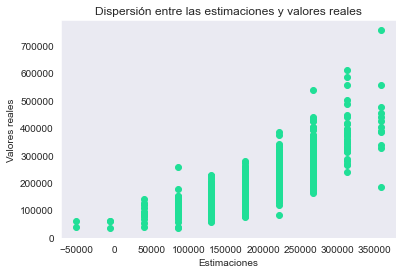

In [28]:
fn.graf_disper_y_valores_reales(estimaciones_g, vr)

###  Grafica de prediccion con 75k iteraciones

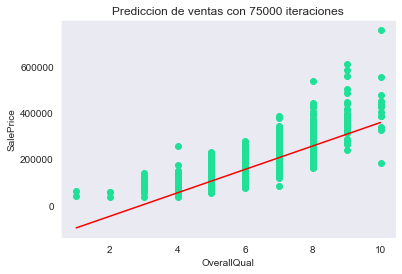

In [29]:
fn.graf_pred_n_epoch(xvariable, yvariable,beta0,beta1, epoch)

### Evolucion de RMSE  con modelo de entranamiento

C:\Users\luish\Documents\Maestria\trimestre2\StatisticalLearning\Proyecto_Final\fncs_prjct.py:156: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Evolución Error Mínimo', fontSize = 16)


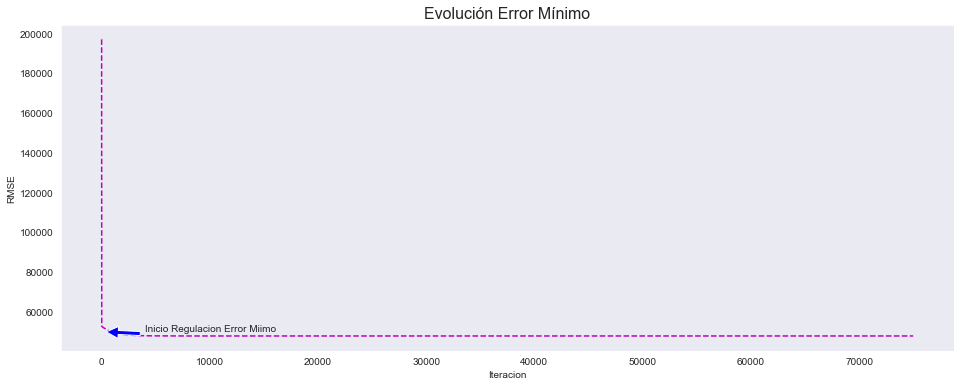

In [30]:
fn.fn_plt_error(rmse) 

### Configuracion Variables para entrenamiento con modelo SKL

In [31]:
variableX2 = np.array(variableX).reshape(-1,1)
variableXt2 = np.array(variableXtest).reshape(-1,1)
variableY2 = np.array(variableY).reshape(-1,1)
variableYt2 = np.array(variableYtest).reshape(-1,1)

In [32]:
reg_ln = LinearRegression()
reg_ln.fit(variableX2,yvariable)
reg_pred = reg_ln.predict(variableXt2)

###  Validacion Modelo Propio  vs Modelo SKLearn

In [33]:
print("Validacion de Intercepto modelo SKL ", reg_ln.intercept_,
      "VS Validacion de Beta0 Modelo Manual", beta0)
print("Validacion de Coeficiente modelo SKL ", reg_ln.coef_,
      "VS Validacion de Beta1 Modelo Manual", beta1)
print("Validacion de RMSE modelo SKL ", mean_squared_error(variableYt2, reg_pred, squared = False),
      "VS Validacion de RMSE Modelo Manual", rmse[-1])

Validacion de Intercepto modelo SKL  -96469.57131873982 VS Validacion de Beta0 Modelo Manual -96469.5713187239
Validacion de Coeficiente modelo SKL  [45411.99877916] VS Validacion de Beta1 Modelo Manual 45411.99877915666
Validacion de RMSE modelo SKL  51256.80266736316 VS Validacion de RMSE Modelo Manual 47893.970799222094


###  Grafica de comparación Modelo Propio vs Modelo SKLearn

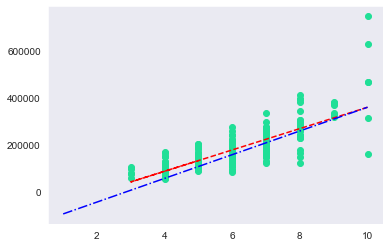

In [34]:
fn.graf_mdl_vs_skl(variableXt2,yvtest,reg_pred,xvtest, beta0, beta1)

### Creacion de DataFrame de evolucion de errores

In [35]:
errores = fn.df_errores(xvtest, yvtest, beta0, beta1)
errores

,X,Y,Y_ESTIMADO,ERROR,ERROR_CUADRATICO,BETA0,BETA1
0,10.0,625000.0,357650.416473,267349.583527,1.228107e+08,-96469.571319,45411.998779
1,6.0,171000.0,176002.421356,-5002.421356,4.299694e+04,-96469.571319,45411.998779
2,6.0,163000.0,176002.421356,-13002.421356,2.904862e+05,-96469.571319,45411.998779
3,7.0,171900.0,221414.420135,-49514.420135,4.212505e+06,-96469.571319,45411.998779
4,5.0,200500.0,130590.422577,69909.577423,8.397507e+06,-96469.571319,45411.998779
...,...,...,...,...,...,...,...
286,6.0,175000.0,176002.421356,-1002.421356,1.726544e+03,-96469.571319,45411.998779
287,6.0,210000.0,176002.421356,33997.578644,1.985971e+06,-96469.571319,45411.998779
288,7.0,266500.0,221414.420135,45085.579865,3.492628e+06,-96469.571319,45411.998779
289,5.0,142125.0,130590.422577,11534.577423,2.286022e+05,-96469.571319,45411.998779


### Configuracion de variables de Y y Y estimado para Gradiantes de errores  Modelo Propio vs Modelo SKLearn

In [36]:
ytest1 = errores['Y']
yestimado1 = errores['Y_ESTIMADO']
gradiante_y = np.asmatrix(ytest1) - np.asmatrix(yestimado1)
skl_y = yvtest - reg_pred

### Distribucion de error ambos modelos

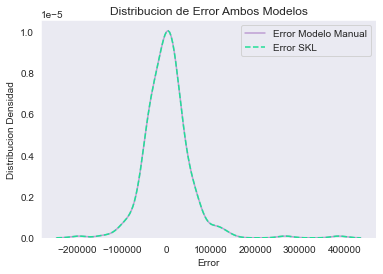

In [37]:
fn.graf_dis_dens_errors_mdls(gradiante_y, skl_y)